In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:

#APPROACH 1
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3,bias=False)
        #INPUT 28X28X1 >>3X3X1X10 >>OUTPUT:26X26X10 RF=3
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3,bias=False)
        #INPUT 26X26X10 >>3X3X1X10 >>OUTPUT:24X24X10 RF=5
        self.conv3 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3,bias=False)
        #INPUT 24 OUTPUT 22 RF 7
        self.conv4 = nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3,bias=False)
        #INPUT 22 OUTPUT 20 RF 11
        self.pool1 = nn.MaxPool2d(2,2)  #INPUT 20  OUTPUT 10  RF 22
        self.conv5 = nn.Conv2d(in_channels=20, out_channels=30, kernel_size=3,bias=False) #INPUT 10   OUTPUT 8 RF 24
        self.conv6 = nn.Conv2d(in_channels=30, out_channels=47, kernel_size=3, bias=False)  #INPUT 8   OUTPUT 6 RF 26
        #here output is 6X6X47

        self.gap=nn.AvgPool2d(6,6) #6X6X47 pool 2d 1X1X62
        

        # self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        # self.fc2 = nn.Linear(in_features=120, out_features=60)
        # self.out = nn.Linear(in_features=60, out_features=62)

    def forward(self, t):
        # (1) input layer
        t = t

        # 1st hidden layer 
        t = self.conv1(t)
        t = F.relu(t)

        # 2nd  hidden layer 
        t = self.conv2(t)
        t = F.relu(t)

        # 3rd hidden layer 
        t = self.conv3(t)
        t = F.relu(t)

        # 4th  hidden layer 
        t = self.conv4(t)
        t = F.relu(t)
        t = self.pool1(t)

        # 5th hidden layer 
        t = self.conv5(t)
        t = F.relu(t)

        # 6th hidden layer 
        t = self.conv6(t)
       # t = F.relu(t)


        # (6) output layer
        t = self.gap(t)
       
        t = F.softmax(t.view(-1,47), dim=1)

        return t

In [12]:
#APPROACH 2

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3) #  1x28x28 -> 10x26x26 rf-3x3
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3) #  10x26x26 -> 10x24x24 rf -5x5 
        self.pool1 = nn.MaxPool2d(2, 2)#  10x24x24 -> 10x12x12 rf- 10x10

        self.conv3 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3) #  10x12*12 -> 20x10x10 rf - 12x12
        self.conv4 = nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3) #  20x10x10 -> 20x8x8 rf - 14x14
        self.pool2 = nn.MaxPool2d(2, 2)#  20x8x8 -> 20x4x4 rf - 28x28

        self.conv5 = nn.Conv2d(in_channels=20, out_channels=30, kernel_size=3) #  20x4x4 -> 30x2x2 rf - 30x30
        self.conv6 = nn.Conv2d(in_channels=30, out_channels=47, kernel_size=1) #  30x2x2 -> 47x2x2 rf - 30x30



    def forward(self, t):
        # implement the forward pass
        x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(t)))))                #The forward function computes output Tensors from input Tensors.
        x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
        x = (self.conv6(F.relu(self.conv5(x))))

        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = x.view(-1, 47)
        
        return F.log_softmax(x)

In [13]:
!pip install torchsummary
from torchsummary import summary

In [14]:
network = Network()
network.parameters

<bound method Module.parameters of Network(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(30, 47, kernel_size=(1, 1), stride=(1, 1))
)>

In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt


train_set = torchvision.datasets.EMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,split='balanced'
    ,transform=transforms.Compose([
                                 
        transforms.ToTensor()
    ])
)
#check label count 
print(train_set.train_labels.bincount())

print("Number of unique class ",len(train_set.train_labels.unique()))

tensor([2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400,
        2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400,
        2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400,
        2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400])
Number of unique class  47


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [16]:
(train_set.train_labels).unique()

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

tensor([ 3, 26, 34, 10, 16, 25,  4,  3, 24, 41])
get shape of features and labels
torch.Size([10, 1, 28, 28]) torch.Size([10])


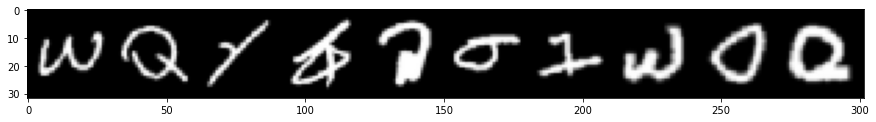

In [17]:
#see first 10 images with labels 
train_loader=torch.utils.data.DataLoader(train_set,
                                         batch_size=10,
                                         shuffle=True)
f_batch=next(iter(train_loader))
images,labels=f_batch

grid=torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print(labels)
print("get shape of features and labels" )
print(images.shape,labels.shape)

In [18]:
#utils
def get_num_correct(preds,labels):
  x=preds.argmax(dim=1).eq(labels).sum().item()
  return x

def get_num_incorrect(preds,labels):
  x=(~preds.argmax(dim=1).eq(labels)).sum().item()
  return x

In [19]:
use_cuda = torch.cuda.is_available() #create a boolean to check if GPU is available 
device = torch.device("cuda" if use_cuda else "cpu")
network =  Network().to(device) #Pushing the model to GPU
#network =Network()


In [21]:
import torch.optim as optim

torch.set_grad_enabled(True)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):

    total_loss = 0
    total_correct = 0
    total_incorrect=0

    for batch in train_loader: # Get Batch
        images, labels = batch 
        images=images.to(device)
        labels=labels.to(device)

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)
        total_incorrect += get_num_incorrect(preds, labels)
        

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "total_incorrect:", total_incorrect,
        "Acc:", total_correct/len(train_set),
        "loss:", total_loss
    )


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


epoch 0 total_correct: 2429 total_incorrect: 110371 Acc: 0.021533687943262412 loss: 43491.499151706696
epoch 1 total_correct: 2399 total_incorrect: 110401 Acc: 0.0212677304964539 loss: 43489.33050894737
epoch 2 total_correct: 2422 total_incorrect: 110378 Acc: 0.021471631205673757 loss: 43493.62173700333
epoch 3 total_correct: 2312 total_incorrect: 110488 Acc: 0.02049645390070922 loss: 43495.317461013794
epoch 4 total_correct: 2403 total_incorrect: 110397 Acc: 0.021303191489361703 loss: 43493.1478099823
epoch 5 total_correct: 2436 total_incorrect: 110364 Acc: 0.021595744680851063 loss: 43489.66937637329
epoch 6 total_correct: 2401 total_incorrect: 110399 Acc: 0.0212854609929078 loss: 43490.24486494064
epoch 7 total_correct: 2393 total_incorrect: 110407 Acc: 0.0212145390070922 loss: 43492.919429302216
epoch 8 total_correct: 2309 total_incorrect: 110491 Acc: 0.020469858156028368 loss: 43489.190747737885
epoch 9 total_correct: 2342 total_incorrect: 110458 Acc: 0.02076241134751773 loss: 434

In [ ]:

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Network().to(device)
summary(model, input_size=(1, 28, 28))